# sklearn.svm: Support Vector Machines

* `svm.LinearSVC([penalty, loss, dual, tol, C, …])`  Linear Support Vector Classification.
* `svm.LinearSVR([epsilon, tol, C, loss, …])`: Linear Support Vector Regression.
* `svm.NuSVC([nu, kernel, degree, gamma, …])`: Nu-Support Vector Classification.
* `svm.NuSVR([nu, C, kernel, degree, gamma, …])`: Nu Support Vector Regression.
* `svm.OneClassSVM([kernel, degree, gamma, …])`: Unsupervised Outlier Detection.
* `svm.SVC([C, kernel, degree, gamma, coef0, …])`: C-Support Vector Classification.
* `svm.SVR([kernel, degree, gamma, coef0, tol, …])`: Epsilon-Support Vector Regression.
* `svm.l1_min_c(X, y[, loss, fit_intercept, …])`: Return the lowest bound for C such that for C in (l1_min_C, infinity) the model is guaranteed not to be empty.

Regression models are not suited for the problem at hand

We will be using TFIDF preprocessing. Most of the models will be left at default. Other script will explore other kernels.

In [17]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC, NuSVC, OneClassSVM, SVC, SVR, l1_min_c
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import gensim
import sys
sys.path.insert(0, '/home/mcunha/Documents/Classes/KW/G0B34a_knowledge_and_the_web/')
import data.ad_hominem.tokenize_df
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

#### Defining a function that will be used later...

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Just cleaned the data frame a bit

In [3]:
fallacies = pd.read_csv("../../data/ad_hominem/ad_hominems_cleaned_Murilo.csv")
fallacies = fallacies.drop(['Unnamed: 0'], axis=1)
fallacies = data.ad_hominem.tokenize_df.preprocess_df(fallacies)
fallacies['reddit_ad_hominem.body'].replace('', np.nan, inplace=True)
fallacies.dropna(subset=['reddit_ad_hominem.body'], inplace=True)
fallacies.reset_index()
train_data, test_data = train_test_split(fallacies, test_size=0.3, random_state=3)

fallacies.tail(n=10)

,reddit_ad_hominem.body,reddit_ad_hominem.ad_hominem
29277,we re gonna back him because we won know the d...,0
29278,gender,0
29279,which was alienating and confusing it makes yo...,0
29280,and the such my relationship was my baptize by...,0
29281,because that was label that other can understand,0
29282,it is more effective to report it than downvot...,0
29283,which was alienating and confusing it makes yo...,0
29284,because that was quot label that other,0
29285,times more iron fragments than asbestos,0
29286,ve never heard of supreme court rulings allowi...,0


#### I used the TdidfVectorizer from /models/01_tfidf/tfidf.ipynb

In [4]:
v = TfidfVectorizer(ngram_range = (1, 1), max_features=3000)
v.fit(train_data['reddit_ad_hominem.body'].values.astype('U'))

x_train = v.transform(train_data['reddit_ad_hominem.body'].values.astype('U'))
y_train = list(train_data["reddit_ad_hominem.ad_hominem"])

x_test = v.transform(test_data['reddit_ad_hominem.body'].values.astype('U'))
y_test = list(test_data["reddit_ad_hominem.ad_hominem"])

# LinearSVC

Fitting linear model...
Done!
Confusion matrix, without normalization
[[7936  143]
 [ 481  210]]
Normalized confusion matrix
[[0.98 0.02]
 [0.7  0.3 ]]


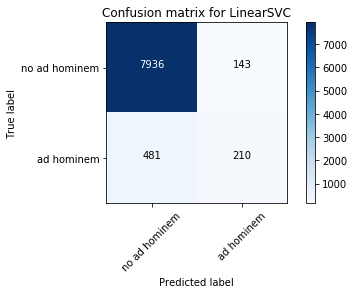

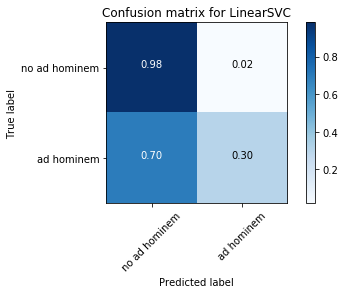

In [5]:
%%time

print("Fitting linear model...")
linearModel = LinearSVC().fit(x_train, y_train)
print("Done!")

predicted = linearModel.predict(x_test)

# Compute confusion matrix
linearModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + LinearSVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(linearModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(linearModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## NuSVC
Could refine the nu-value.

Fitting regression model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 19.9 s, sys: 240 ms, total: 20.1 s
Wall time: 20 s


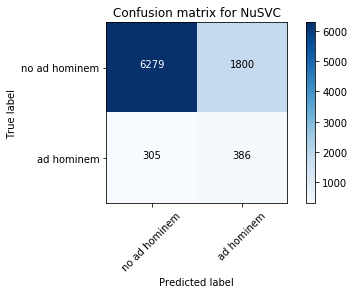

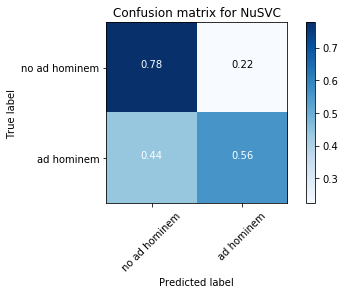

In [34]:
%%time

print("Fitting NuSVC model...")
nuModel = NuSVC(nu=0.05).fit(x_train, y_train)
print("Done!")

predicted = nuModel.predict(x_test)

# Compute confusion matrix
nuModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + NuSVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## OneClassSVM

This is a form of unsupervised learning. Hence, it does not use the true label (here referenced as `y_train`) for training. So to compute the matrix, there were 2 interpretation:

* `1` correlates to `1` (or `true`) in `reddit_ad_hominem.ad_hominem`. In other words, body is classified as contains ad hominem fallacy. Conversely, `-1` correlates to `0` (or `false`) in `reddit_ad_hominem.ad_hominem`
* The opposite (`1` correlates to `0` (or `false`) and `-1` correlates to `1` (or `true`)

Confusion matrix yield is the same, with data input placed at different locations. Both were plotted below.

In [40]:
%%time

print("Fitting OneClassSVM model...")
oneClassModel = OneClassSVM().fit(x_train)
print("Done!")

Fitting regression model...
Done!
CPU times: user 3min 39s, sys: 252 ms, total: 3min 39s
Wall time: 3min 39s


Confusion matrix, without normalization
[[4061 4018]
 [ 290  401]]
Normalized confusion matrix
[[0.5  0.5 ]
 [0.42 0.58]]


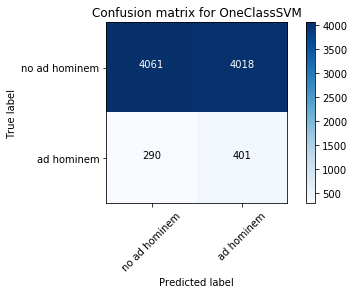

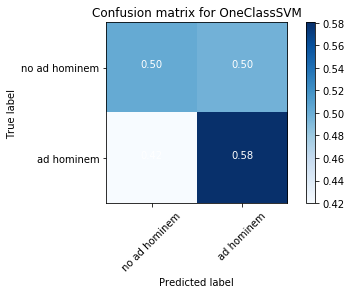

In [42]:
predicted = oneClassModel.predict(x_test)
predicted = np.where(predicted == 1,True, False)

# Compute confusion matrix
oneClassModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + OneClassSVM.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(oneClassModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(oneClassModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

Confusion matrix, without normalization
[[4018 4061]
 [ 401  290]]
Normalized confusion matrix
[[0.5  0.5 ]
 [0.58 0.42]]


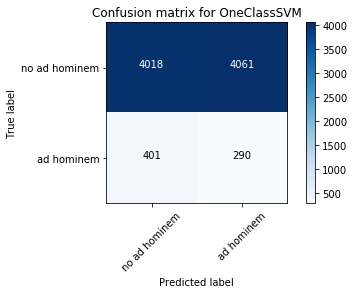

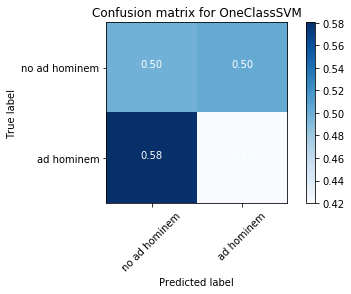

In [43]:
predicted = oneClassModel.predict(x_test)
predicted = np.where(predicted == -1,True, False)

# Compute confusion matrix
oneClassModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + OneClassSVM.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(oneClassModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(oneClassModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

## SVC
Theoretically equivalent to other methods (LinearSVC and NuSVC), but uses different implementations.
* `LinearSVC` is equivalent to `SVC(kernel = 'linear')`
* From documentation: *`SVC` and `NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section [Mathematical formulation](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation))*

Fitting SVC model...
Done!
Confusion matrix, without normalization
[[6279 1800]
 [ 305  386]]
Normalized confusion matrix
[[0.78 0.22]
 [0.44 0.56]]
CPU times: user 57.3 s, sys: 260 ms, total: 57.6 s
Wall time: 57.4 s


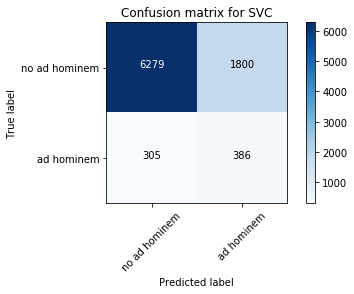

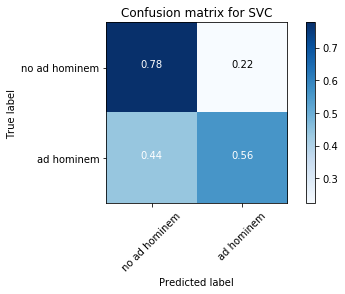

In [44]:
%%time

print("Fitting SVC model...")
svcModel = SVC().fit(x_train, y_train)
print("Done!")

predicted = svcModel.predict(x_test)

# Compute confusion matrix
svcModel_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + SVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(nuModel_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)